To complete this assignment, let’s perform classification using logistic regression on the Iris dataset, compute the confusion matrix to derive key performance metrics, and plot the AUROC curve for the multi-class model. I’ll provide step-by-step Python code for each task.

### Step 1: Import Libraries and Load the Dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Load the Iris dataset
df = pd.read_csv('F:/myPortfolio/Programming/Masters in Science - Computer Science/20241105-Practicals-Big_Data_Analysis/iris/iris.csv')

# Dropping the unnecessary "Id" column if it exists
df = df.drop(columns=['Id'], errors='ignore')

# Display the first few rows of the dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Step 2: Prepare Data for Logistic Regression

For logistic regression, we need to encode the target variable (`Species`) as numeric values and split the data into training and testing sets.

In [3]:
# Encoding the target variable 'Species'
df['Species'] = df['Species'].astype('category').cat.codes

# Defining features and target variable
X = df.drop('Species', axis=1)
y = df['Species']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 3: Implement Logistic Regression Model

In [4]:
# Initializing and fitting the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

### Step 4: Compute Confusion Matrix and Performance Metrics

We’ll compute the confusion matrix and then calculate True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN). We’ll also calculate accuracy, error rate, precision, and recall.

In [5]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Extracting TP, FP, TN, FN from confusion matrix for multi-class classification
# Summing up the diagonal elements gives True Positives (TP) for each class
tp = np.diag(cm)
fp = cm.sum(axis=0) - tp
fn = cm.sum(axis=1) - tp
tn = cm.sum() - (fp + fn + tp)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Displaying the results
print("Confusion Matrix:\n", cm)
print("\nPerformance Metrics:")
print("True Positives (TP):", tp)
print("False Positives (FP):", fp)
print("True Negatives (TN):", tn)
print("False Negatives (FN):", fn)
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Performance Metrics:
True Positives (TP): [10  9 11]
False Positives (FP): [0 0 0]
True Negatives (TN): [20 21 19]
False Negatives (FN): [0 0 0]
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall: 1.0


### Step 5: Plot AUROC Curve for Multi-Class Model

For multi-class problems, we need to calculate and plot AUROC for each class. To achieve this, we’ll binarize the target variable to handle multi-class data.

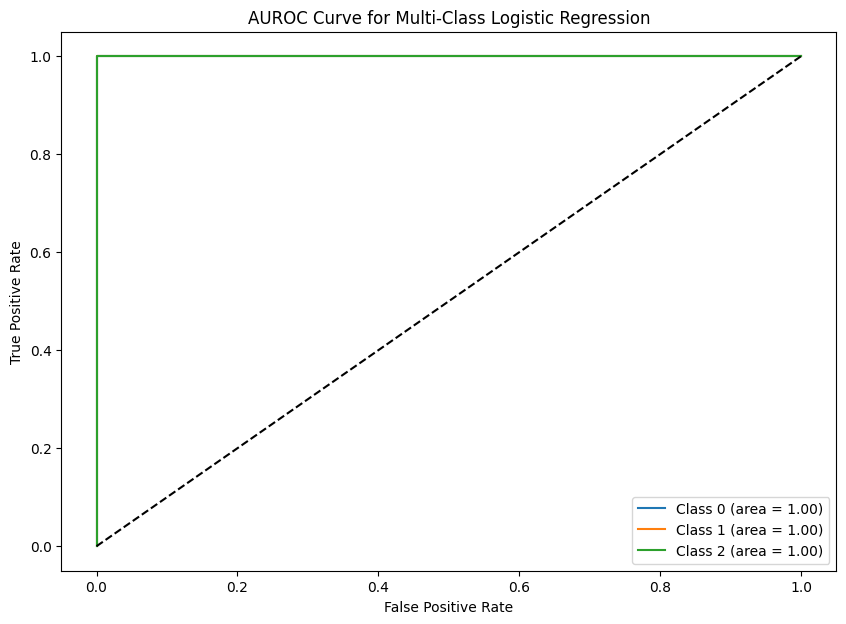

In [7]:
# Binarize the output for multi-class AUROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Predict probabilities for each class
y_score = model.predict_proba(X_test)

# Compute AUROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting AUROC for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (area = {roc_auc[i]:.2f})")

# Plotting the diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUROC Curve for Multi-Class Logistic Regression")
plt.legend(loc="lower right")
plt.show()


### Explanation of Steps and Outputs

1. **Confusion Matrix and Metrics**:
   - We used the `confusion_matrix` function to get the confusion matrix, then calculated TP, FP, TN, and FN for each class. 
   - From these, we computed accuracy, error rate, precision, and recall.
   
2. **AUROC Curve**:
   - In a multi-class setting, we binarized `y_test` to compute ROC curves for each class. 
   - Each curve’s area under the ROC (AUROC) is then plotted, showing the model’s performance for each class, with a random baseline line for comparison. 

### Observations

- **Confusion Matrix**: Gives insights into the model’s performance per class, showing how many instances are correctly or incorrectly classified.
- **AUROC**: Each class’s AUROC score shows how well the model distinguishes between classes, where a higher AUROC indicates better separability for that class.